In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [5]:
# Load the dataset
dataset_path = '../dataset(dehydration)(gaurav).csv'  # Replace with your local dataset path
df = pd.read_csv(dataset_path)

# Display dataset information
print(df.head())
print(df.info())
print(df.describe())


   Person_ID Timestamp       GSR       PPG  Accelerometer_X  Accelerometer_Y  \
0          1  06:57:03  1.587780 -0.037938         0.007081         0.062180   
1          1  06:57:04  1.740671  0.062193         0.050705        -0.097732   
2          1  06:57:05  0.503198  0.019892        -0.047157         0.084532   
3          1  06:57:06  1.890174 -0.035672        -0.082038         0.024514   
4          1  06:57:07  1.924591  0.052809         0.245696         0.183922   

   Accelerometer_Z  Gyroscope_X  Gyroscope_Y  Gyroscope_Z  Magnetometer_X  \
0        -0.130126    -0.003703     0.013009     0.004320       -5.461575   
1        -0.091298    -0.008250    -0.001039     0.003140        0.277863   
2         0.057307    -0.004585     0.010770    -0.001153        6.949409   
3         0.180587     0.010396     0.017040    -0.014730        5.642467   
4         0.000093     0.012962    -0.002637    -0.007066       -1.650884   

   Magnetometer_Y  Magnetometer_Z Hydration_Status  
0  

In [7]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Person_ID           0
Timestamp           0
GSR                 0
PPG                 0
Accelerometer_X     0
Accelerometer_Y     0
Accelerometer_Z     0
Gyroscope_X         0
Gyroscope_Y         0
Gyroscope_Z         0
Magnetometer_X      0
Magnetometer_Y      0
Magnetometer_Z      0
Hydration_Status    0
dtype: int64


In [9]:
# Convert 'Timestamp' to time-based features (hour, minute)
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
df['Minute'] = pd.to_datetime(df['Timestamp']).dt.minute

# Calculate activity intensity from accelerometer data
def calculate_activity_intensity(row):
    intensity = np.sqrt(row['Accelerometer_X']**2 + row['Accelerometer_Y']**2 + row['Accelerometer_Z']**2)
    return intensity
df['Activity_Intensity'] = df.apply(calculate_activity_intensity, axis=1)

# Drop irrelevant columns
df = df.drop(['Person_ID', 'Timestamp'], axis=1)

# Map hydration status to numerical values
hydration_mapping = {'Hydrated': 0, 'Mildly Dehydrated': 1, 'Dehydrated': 2}
df['Hydration_Status'] = df['Hydration_Status'].map(hydration_mapping)


C:\Users\SUSIM\AppData\Local\Temp\ipykernel_11676\1783656163.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
C:\Users\SUSIM\AppData\Local\Temp\ipykernel_11676\1783656163.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df['Timestamp']).dt.minute


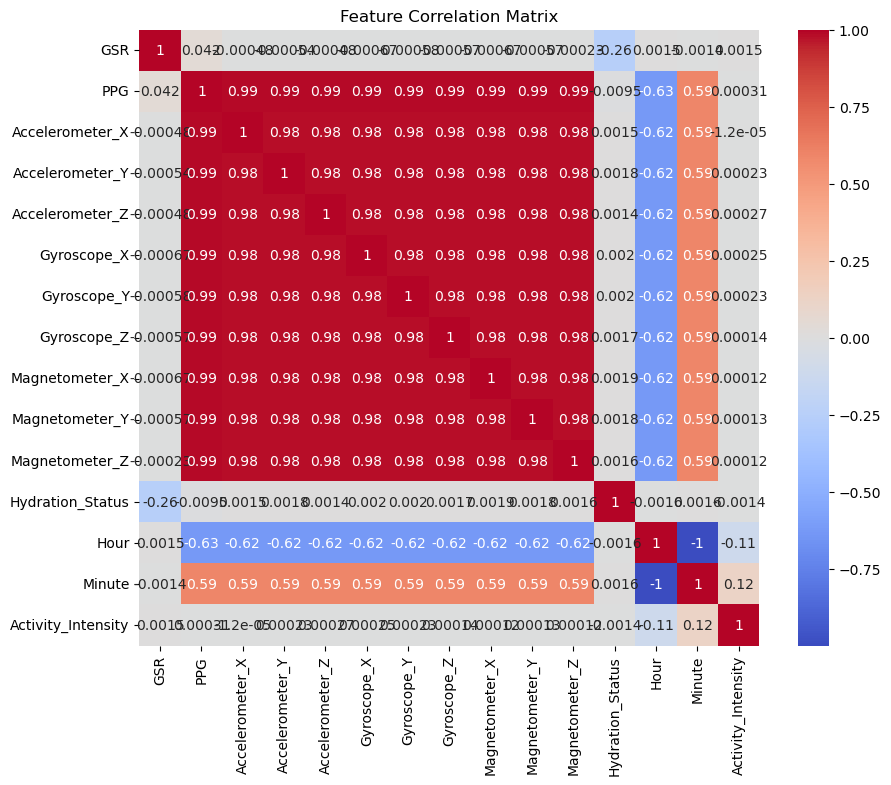

In [11]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [13]:
# Split the dataset into features and target
X = df.drop('Hydration_Status', axis=1)
y = df['Hydration_Status']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Build the ANN Model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: Hydrated, Mildly Dehydrated, Dehydrated
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\SUSIM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.8897 - loss: 0.2372 - val_accuracy: 0.9557 - val_loss: 0.0920
Epoch 2/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.9667 - loss: 0.0786 - val_accuracy: 0.9770 - val_loss: 0.0604
Epoch 3/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9740 - loss: 0.0628 - val_accuracy: 0.9817 - val_loss: 0.0437
Epoch 4/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9770 - loss: 0.0551 - val_accuracy: 0.9718 - val_loss: 0.0510
Epoch 5/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9781 - loss: 0.0517 - val_accuracy: 0.9484 - val_loss: 0.1118
Epoch 6/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9799 - loss: 0.0494 - val_accuracy: 0.9372 - val_loss: 0.1818
Epoch 7/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9815 - loss: 0.0445 - val_accuracy: 0.9286 - val_loss: 0.2225
Epoch 8/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


6554/6554 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8486 - loss: 0.8723
Test Accuracy: 84.97%


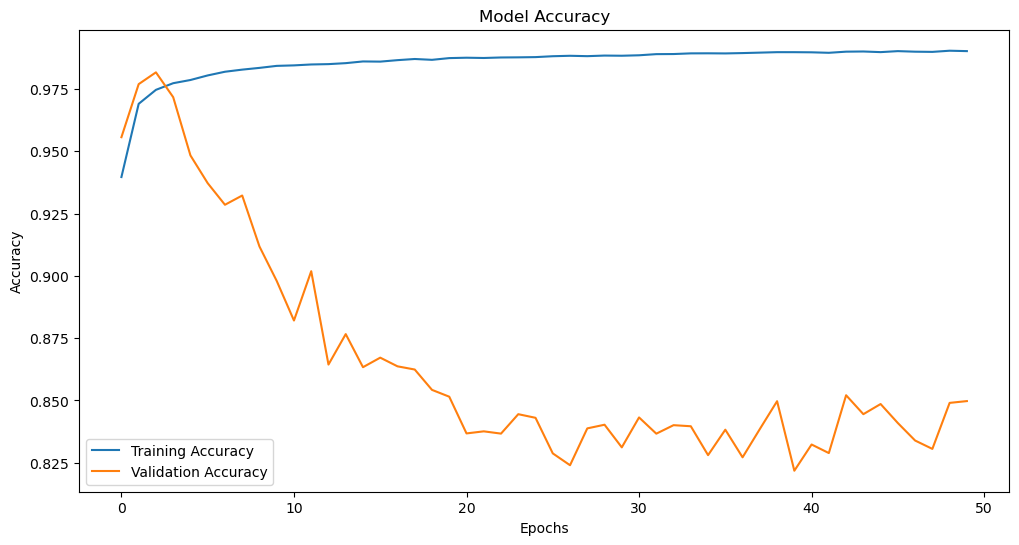

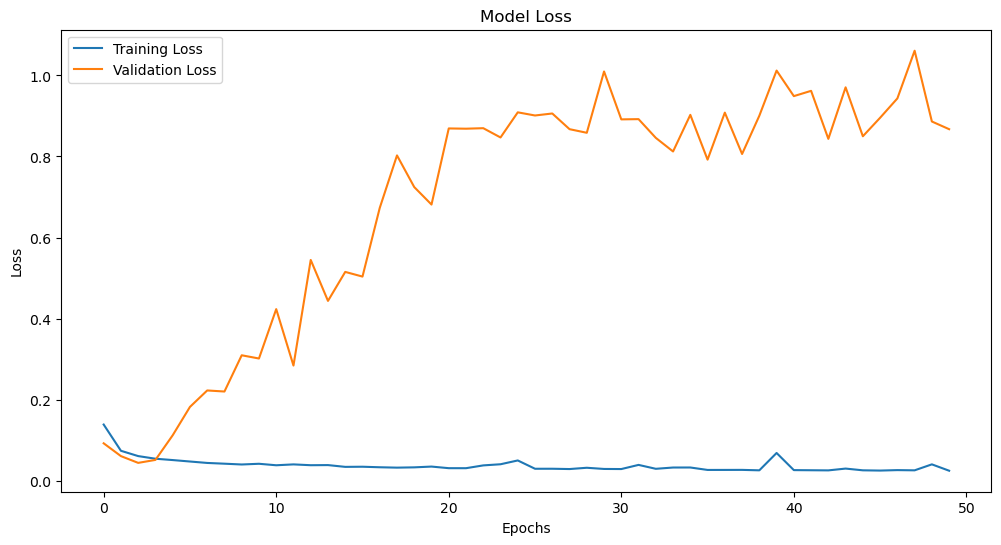

In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
# Save the trained model locally
model.save('hydration_ann_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [39]:
# Function to predict hydration status
def predict_hydration_status(input_data):
    input_data = scaler.transform([input_data])
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction)
    reverse_mapping = {0: 'Hydrated', 1: 'Mildly Dehydrated', 2: 'Dehydrated'}
    return reverse_mapping[predicted_class]

# Example usage
example_input = [0.9, 0.02, 0.1, 0.2, 0.3, 0.01, -0.01, 0.0, -5, 5, 0, 12, 30, 0.5]
print("Predicted Hydration Status:", predict_hydration_status(example_input))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Hydration Status: Mildly Dehydrated


C:\Users\SUSIM\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [44]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('hydration_ann_model.h5')


In [46]:
import joblib

# Load the scaler
scaler = joblib.load('scaler.pkl')


In [178]:
# Example new input data
new_input_data = [0.9, 0.02, 0.1, 0.2, 0.3, 0.01, -0.01, 0.0, -5, 5, 0, 12, 30, 0.5]

# Preprocess the input data using the loaded scaler
new_input_data_scaled = scaler.transform([new_input_data])

# Predict hydration status using the loaded model
prediction = model.predict(new_input_data_scaled)
predicted_class = np.argmax(prediction)

# Map prediction back to hydration status
reverse_mapping = {0: 'Hydrated', 1: 'Mildly Dehydrated', 2: 'Dehydrated'}
print("Predicted Hydration Status:", reverse_mapping[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Hydration Status: Mildly Dehydrated


C:\Users\SUSIM\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [182]:
!pip install tensorflow==2.13.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.13.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.13.0


In [188]:
!python --version


Python 3.12.4


'python3.10' is not recognized as an internal or external command,
operable program or batch file.
